<a href="https://colab.research.google.com/github/SantiagoVicentela/Fifa18Proyect/blob/main/Obtencion_Insights_data_set_Fifa_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     | 22.6 MB 29.2 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 14.0 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=357350 sha256=51c970189ba40a389c683499cc0967379427a711aa56c0a65ee8933e0ff1e226
  Stored in directory: /tmp/pip-ephem-wheel-cache-sb2nuu5v/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=883cfd7a7a65b4e147c6ef1479870bb7b2855d2fa145dd73798da23e30f17276
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
S

In [ ]:
#Establecer ruta de acceso en drive
from google.colab import drive
import os
drive.mount('/content/gdrive')
import os

Mounted at /content/gdrive


In [ ]:
%cd '/content/gdrive/MyDrive'

/content/gdrive/MyDrive


In [ ]:
import pandas_profiling

<ipython-input-4-6a00893fb3e1>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
Tabla=pd.read_excel('Fifa18-Version 2.xlsx')
Tabla.head()

,ID,Name,Age,Categoria Edad,Nationality,Wage (€),Categoria Salario,Value (€),Overall,Categoria Overall,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,20801,Cristiano Ronaldo,32,Adulto,Portugal,565000,Salario Extraordinario,95500000,94,Crack,...,96.0,83.0,94.0,23.0,91.0,92.0,31.0,80.0,85.0,88.0
1,158023,L. Messi,30,Adulto,Argentina,565000,Salario Extraordinario,105000000,93,Crack,...,95.0,88.0,85.0,26.0,87.0,73.0,28.0,59.0,90.0,85.0
2,190871,Neymar,25,Adulto Joven,Brazil,280000,Muy Buen Salario,123000000,92,Crack,...,88.0,81.0,80.0,33.0,90.0,78.0,24.0,53.0,80.0,83.0
3,176580,L. Suárez,30,Adulto,Uruguay,510000,Salario Extraordinario,97000000,92,Crack,...,93.0,83.0,87.0,38.0,77.0,89.0,45.0,80.0,84.0,88.0
4,167495,M. Neuer,31,Adulto,Germany,230000,Muy Buen Salario,61000000,92,Crack,...,85.0,55.0,25.0,11.0,61.0,44.0,10.0,83.0,70.0,11.0


In [ ]:
#método set_index() para establecer la column ID como índice
Tabla.set_index('ID', inplace=True)
# Ahora la columna "ID" se convierte en el índice del DataFrame
Tabla

,Name,Age,Categoria Edad,Nationality,Wage (€),Categoria Salario,Value (€),Overall,Categoria Overall,Potential,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
ID,,,,,,,,,,,,,,,,,,,,,
20801,Cristiano Ronaldo,32,Adulto,Portugal,565000,Salario Extraordinario,95500000,94,Crack,94,...,96.0,83.0,94.0,23.0,91.0,92.0,31.0,80.0,85.0,88.0
158023,L. Messi,30,Adulto,Argentina,565000,Salario Extraordinario,105000000,93,Crack,93,...,95.0,88.0,85.0,26.0,87.0,73.0,28.0,59.0,90.0,85.0
190871,Neymar,25,Adulto Joven,Brazil,280000,Muy Buen Salario,123000000,92,Crack,94,...,88.0,81.0,80.0,33.0,90.0,78.0,24.0,53.0,80.0,83.0
176580,L. Suárez,30,Adulto,Uruguay,510000,Salario Extraordinario,97000000,92,Crack,92,...,93.0,83.0,87.0,38.0,77.0,89.0,45.0,80.0,84.0,88.0
167495,M. Neuer,31,Adulto,Germany,230000,Muy Buen Salario,61000000,92,Crack,92,...,85.0,55.0,25.0,11.0,61.0,44.0,10.0,83.0,70.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237463,A. Kelsey,17,Muy Joven,England,1000,Mal Salario,50000,46,Malo,63,...,40.0,19.0,19.0,10.0,32.0,28.0,11.0,50.0,26.0,6.0
11728,B. Richardson,47,Viejo,England,1000,Mal Salario,0,46,Malo,46,...,51.0,12.0,13.0,13.0,25.0,32.0,12.0,47.0,17.0,12.0
231381,J. Young,17,Muy Joven,Scotland,1000,Mal Salario,60000,46,Malo,61,...,54.0,42.0,42.0,14.0,51.0,33.0,17.0,32.0,37.0,33.0


In [ ]:
Tabla.shape
Tabla.count()
Tabla.dtypes

Name                   object
Age                     int64
Categoria Edad         object
Nationality            object
Wage (€)                int64
Categoria Salario      object
Value (€)               int64
Overall                 int64
Categoria Overall      object
Potential               int64
Club                   object
Special                 int64
Acceleration          float64
Aggression            float64
Agility               float64
Balance               float64
Ball control          float64
Composure             float64
Crossing              float64
Curve                 float64
Dribbling             float64
Finishing             float64
Free kick accuracy    float64
GK diving             float64
GK handling           float64
GK kicking            float64
GK positioning        float64
GK reflexes           float64
Heading accuracy      float64
Interceptions         float64
Jumping               float64
Long passing          float64
Long shots            float64
Marking   

In [ ]:
Tabla.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,17981.0,2.514454e+01,4.614272e+00,16.0,21.0,25.0,28.0,47.0
Wage (€),17981.0,1.154697e+04,2.308000e+04,0.0,2000.0,4000.0,12000.0,565000.0
Value (€),17981.0,2.385390e+06,5.353970e+06,0.0,300000.0,675000.0,2100000.0,123000000.0
Overall,17981.0,6.624798e+01,6.987965e+00,46.0,62.0,66.0,71.0,94.0
Potential,17981.0,7.119081e+01,6.102199e+00,46.0,67.0,71.0,75.0,94.0
Special,17981.0,1.594095e+03,2.721514e+02,728.0,1449.0,1633.0,1786.0,2291.0
Acceleration,17897.0,6.457652e+01,1.491831e+01,11.0,56.0,67.0,75.0,96.0
Aggression,17913.0,5.579149e+01,1.747657e+01,11.0,43.0,59.0,69.0,96.0
Agility,17910.0,6.333361e+01,1.480280e+01,14.0,55.0,65.0,74.0,96.0
Balance,17924.0,6.380389e+01,1.410095e+01,11.0,56.0,66.0,74.0,96.0


In [ ]:
#Separo mis variables en Numericas y Categoricas para operaciones posteriores
numericas = Tabla.select_dtypes(['int64','float64']).columns
categoricas = Tabla.select_dtypes(['object']).columns

In [ ]:
#Remplazo Nulos por la Media en mis variables numericas
for col in Tabla[numericas]:
    media = Tabla[col].mean()
    Tabla[col].fillna(media, inplace=True)
Tabla.head()

,Name,Age,Categoria Edad,Nationality,Wage (€),Categoria Salario,Value (€),Overall,Categoria Overall,Potential,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
ID,,,,,,,,,,,,,,,,,,,,,
20801,Cristiano Ronaldo,32,Adulto,Portugal,565000,Salario Extraordinario,95500000,94,Crack,94,...,96.0,83.0,94.0,23.0,91.0,92.0,31.0,80.0,85.0,88.0
158023,L. Messi,30,Adulto,Argentina,565000,Salario Extraordinario,105000000,93,Crack,93,...,95.0,88.0,85.0,26.0,87.0,73.0,28.0,59.0,90.0,85.0
190871,Neymar,25,Adulto Joven,Brazil,280000,Muy Buen Salario,123000000,92,Crack,94,...,88.0,81.0,80.0,33.0,90.0,78.0,24.0,53.0,80.0,83.0
176580,L. Suárez,30,Adulto,Uruguay,510000,Salario Extraordinario,97000000,92,Crack,92,...,93.0,83.0,87.0,38.0,77.0,89.0,45.0,80.0,84.0,88.0
167495,M. Neuer,31,Adulto,Germany,230000,Muy Buen Salario,61000000,92,Crack,92,...,85.0,55.0,25.0,11.0,61.0,44.0,10.0,83.0,70.0,11.0


In [ ]:
#Elimio las filas con valores nulos de variables categoricas
Tabla.dropna(subset=categoricas, inplace=True)
Tabla.head()

,Name,Age,Categoria Edad,Nationality,Wage (€),Categoria Salario,Value (€),Overall,Categoria Overall,Potential,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
ID,,,,,,,,,,,,,,,,,,,,,
20801,Cristiano Ronaldo,32,Adulto,Portugal,565000,Salario Extraordinario,95500000,94,Crack,94,...,96.0,83.0,94.0,23.0,91.0,92.0,31.0,80.0,85.0,88.0
158023,L. Messi,30,Adulto,Argentina,565000,Salario Extraordinario,105000000,93,Crack,93,...,95.0,88.0,85.0,26.0,87.0,73.0,28.0,59.0,90.0,85.0
190871,Neymar,25,Adulto Joven,Brazil,280000,Muy Buen Salario,123000000,92,Crack,94,...,88.0,81.0,80.0,33.0,90.0,78.0,24.0,53.0,80.0,83.0
176580,L. Suárez,30,Adulto,Uruguay,510000,Salario Extraordinario,97000000,92,Crack,92,...,93.0,83.0,87.0,38.0,77.0,89.0,45.0,80.0,84.0,88.0
167495,M. Neuer,31,Adulto,Germany,230000,Muy Buen Salario,61000000,92,Crack,92,...,85.0,55.0,25.0,11.0,61.0,44.0,10.0,83.0,70.0,11.0


Correlación de Pearson:

También conocida como correlación lineal o correlación paramétrica.
Mide la relación lineal entre dos variables continuas.
Adecuada para variables cuantitativas que siguen una distribución normal.
Calcula el coeficiente de correlación de Pearson (r), que varía entre -1 y 1.
r > 0 indica una correlación positiva (a medida que una variable aumenta, la otra también tiende a aumentar).
r < 0 indica una correlación negativa (a medida que una variable aumenta, la otra tiende a disminuir).
r = 0 indica que no hay una correlación lineal.
Sensible a valores atípicos (outliers) que pueden distorsionar la relación.

Correlación de Spearman:

También conocida como correlación no paramétrica o correlación por rangos.
Mide la relación monótona entre dos variables, es decir, si, en general, una variable tiende a aumentar cuando la otra aumenta.
Adecuada para variables ordinales o cuando la relación no es lineal.
Calcula el coeficiente de correlación de Spearman (ρ), que también varía entre -1 y 1.
ρ > 0 indica una correlación monótona positiva.
ρ < 0 indica una correlación monótona negativa.
ρ = 0 indica que no hay una correlación monótona.
Menos sensible a valores atípicos en comparación con Pearson debido a que se basa en rangos.

En resumen, la correlación de Pearson se utiliza para medir la relación lineal entre variables cuantitativas, mientras que la correlación de Spearman se usa cuando no se cumplen los supuestos de linealidad o cuando se trabaja con variables ordinales. Spearman también es más robusta frente a valores atípicos. La elección entre estos métodos depende de la naturaleza de tus datos y los objetivos de tu análisis.

In [ ]:
Tabla.corr(method = 'spearman')

<ipython-input-13-382b2df5ee23>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Tabla.corr(method = 'spearman')


,Age,Wage (€),Value (€),Overall,Potential,Special,Acceleration,Aggression,Agility,Balance,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
Age,1.000000,0.327343,0.248498,0.493695,-0.223751,0.329060,-0.113459,0.311871,0.016954,-0.075362,...,0.492864,0.221868,0.235313,0.150599,-0.096617,0.197141,0.171165,0.346490,0.223056,0.169096
Wage (€),0.327343,1.000000,0.802810,0.818889,0.602748,0.576791,0.199831,0.344455,0.251204,0.109911,...,0.670688,0.517372,0.453842,0.228404,0.217690,0.343567,0.253803,0.275692,0.431801,0.365475
Value (€),0.248498,0.802810,1.000000,0.941373,0.782507,0.664771,0.308948,0.376699,0.343380,0.160876,...,0.762154,0.611800,0.524058,0.241213,0.329660,0.436625,0.276161,0.288203,0.511078,0.424977
Overall,0.493695,0.818889,0.941373,1.000000,0.648787,0.668004,0.202982,0.426377,0.273106,0.094944,...,0.834839,0.592431,0.500698,0.278040,0.226211,0.417512,0.313970,0.355831,0.490450,0.380996
Potential,-0.223751,0.602748,0.782507,0.648787,1.000000,0.404231,0.237951,0.190715,0.224645,0.127332,...,0.483306,0.427787,0.312385,0.167488,0.249080,0.225637,0.189012,0.106400,0.324532,0.237593
Special,0.329060,0.576791,0.664771,0.668004,0.404231,1.000000,0.534687,0.590666,0.622675,0.498363,...,0.635553,0.859474,0.778142,0.464013,0.529856,0.712242,0.482755,0.171950,0.765517,0.706130
Acceleration,-0.113459,0.199831,0.308948,0.202982,0.237951,0.534687,1.000000,0.114870,0.781133,0.657528,...,0.168843,0.395127,0.435703,0.072693,0.900896,0.467278,0.050812,-0.216155,0.421555,0.511343
Aggression,0.311871,0.344455,0.376699,0.426377,0.190715,0.590666,0.114870,1.000000,0.129940,0.091585,...,0.406479,0.492840,0.414798,0.698847,0.157178,0.573012,0.720657,0.494624,0.253956,0.230166
Agility,0.016954,0.251204,0.343380,0.273106,0.224645,0.622675,0.781133,0.129940,1.000000,0.745007,...,0.269368,0.509653,0.489602,0.049757,0.720435,0.464177,0.038960,-0.273854,0.571229,0.586192
Balance,-0.075362,0.109911,0.160876,0.094944,0.127332,0.498363,0.657528,0.091585,0.745007,1.000000,...,0.125524,0.442910,0.366766,0.099780,0.575022,0.357067,0.077878,-0.433691,0.471152,0.467364


In [ ]:
Tabla.corr(method = 'pearson')

<ipython-input-14-27d8f3e62064>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Tabla.corr(method = 'pearson')


,Age,Wage (€),Value (€),Overall,Potential,Special,Acceleration,Aggression,Agility,Balance,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
Age,1.000000,0.155308,0.083475,0.460797,-0.217946,0.242059,-0.150936,0.268532,-0.015617,-0.087032,...,0.462954,0.134882,0.154096,0.109150,-0.139573,0.088928,0.127716,0.321734,0.192603,0.136328
Wage (€),0.155308,1.000000,0.850061,0.598918,0.521456,0.370389,0.147527,0.208655,0.174115,0.086529,...,0.505668,0.309468,0.273786,0.116488,0.154505,0.204086,0.131669,0.166030,0.319086,0.268930
Value (€),0.083475,0.850061,1.000000,0.630999,0.590996,0.379608,0.177601,0.187995,0.201964,0.106288,...,0.533904,0.324772,0.281125,0.083844,0.181871,0.212427,0.103983,0.140793,0.346115,0.288191
Overall,0.460797,0.598918,0.630999,1.000000,0.683018,0.606545,0.206033,0.400200,0.266965,0.096833,...,0.838362,0.487801,0.429308,0.219884,0.223233,0.357527,0.251066,0.354717,0.478785,0.379058
Potential,-0.217946,0.521456,0.590996,0.683018,1.000000,0.399892,0.246213,0.187675,0.232998,0.134397,...,0.516514,0.368637,0.289716,0.131736,0.253596,0.221857,0.147843,0.108283,0.336919,0.254927
Special,0.242059,0.370389,0.379608,0.606545,0.399892,1.000000,0.647967,0.666826,0.688982,0.577358,...,0.588031,0.900523,0.828165,0.509601,0.645449,0.789439,0.537143,0.189143,0.752044,0.761391
Acceleration,-0.150936,0.147527,0.177601,0.206033,0.246213,0.647967,1.000000,0.249102,0.798447,0.700299,...,0.192431,0.559436,0.534754,0.151989,0.914321,0.604599,0.151312,-0.162689,0.455330,0.566819
Aggression,0.268532,0.208655,0.187995,0.400200,0.187675,0.666826,0.249102,1.000000,0.232604,0.182076,...,0.397230,0.595559,0.495247,0.707660,0.281468,0.643500,0.730440,0.463845,0.297860,0.318288
Agility,-0.015617,0.174115,0.201964,0.266965,0.232998,0.688982,0.798447,0.232604,1.000000,0.765972,...,0.278280,0.607921,0.562707,0.103825,0.751820,0.558922,0.109596,-0.244791,0.589346,0.620057
Balance,-0.087032,0.086529,0.106288,0.096833,0.134397,0.577358,0.700299,0.182076,0.765972,1.000000,...,0.138580,0.534176,0.451114,0.149774,0.634843,0.467862,0.143733,-0.405073,0.486563,0.509455


In [ ]:
# Calcular la matriz de correlación entre todas las características y la variable 'Overall'
correlation_matrix = Tabla.corr()

# Calcular las correlaciones entre 'Overall' y todas las características
overall_correlations = correlation_matrix['Overall']

# Seleccionar las características con correlación mayor a 0.45 o menor a -0.45
variables_seleccionadas = overall_correlations[(overall_correlations > 0.45) | (overall_correlations < -0.45)]

# Crear una lista con las variables seleccionadas
variables_a_incluir = list(variables_seleccionadas.index)

# Agregar las variables numéricas 'Age' , 'Wage (€) y Value (€)' si no están ya incluidas
if 'Age' not in variables_a_incluir:
    variables_a_incluir.append('Age')
if 'Wage (€)' not in variables_a_incluir:
    variables_a_incluir.append('Wage (€)')
if 'Value (€)' not in variables_a_incluir:
    variables_a_incluir.append('Value (€)')

# Agregar las variables categóricas si no están ya incluidas
variables_categoricas = Tabla.select_dtypes(include=['object']).columns
for var in variables_categoricas:
    if var not in variables_a_incluir:
        variables_a_incluir.append(var)

# Crear una nueva tabla con las variables seleccionadas, numéricas y categóricas
Tabla_final = Tabla[variables_a_incluir]

# Reorganizar las columnas en el orden deseado
column_order = ['Name', 'Nationality', 'Club', 'Overall', 'Age', 'Wage (€)',"Value (€)"] + \
                [col for col in Tabla_final.columns if col not in ['Name', 'Nationality', 'Club', 'Overall', 'Age', 'Wage (€)',"Value (€)"]]
datos_final = Tabla_final[column_order]

# Guardar la nueva tabla en un archivo CSV
Tabla_final.to_csv('datos_final.csv', index=False)

# Mostrar información sobre las variables seleccionadas, numéricas y categóricas
print("Número de variables seleccionadas, numéricas y categóricas:", len(variables_a_incluir))
print("Variables seleccionadas, numéricas y categóricas:")
print(variables_a_incluir)

<ipython-input-11-883d1682530d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Tabla.corr()


Número de variables seleccionadas, numéricas y categóricas: 18
Variables seleccionadas, numéricas y categóricas:
['Age', 'Wage (€)', 'Value (€)', 'Overall', 'Potential', 'Special', 'Ball control', 'Composure', 'Long passing', 'Reactions', 'Short passing', 'Vision', 'Name', 'Categoria Edad', 'Nationality', 'Categoria Salario', 'Categoria Overall', 'Club']


In [ ]:
Tabla_final

,Age,Wage (€),Value (€),Overall,Potential,Special,Ball control,Composure,Long passing,Reactions,Short passing,Vision,Name,Categoria Edad,Nationality,Categoria Salario,Categoria Overall,Club
ID,,,,,,,,,,,,,,,,,,
20801,32,565000,95500000,94,94,2228,93.0,95.0,77.0,96.0,83.0,85.0,Cristiano Ronaldo,Adulto,Portugal,Salario Extraordinario,Crack,Real Madrid CF
158023,30,565000,105000000,93,93,2154,95.0,96.0,87.0,95.0,88.0,90.0,L. Messi,Adulto,Argentina,Salario Extraordinario,Crack,FC Barcelona
190871,25,280000,123000000,92,94,2100,95.0,92.0,75.0,88.0,81.0,80.0,Neymar,Adulto Joven,Brazil,Muy Buen Salario,Crack,Paris Saint-Germain
176580,30,510000,97000000,92,92,2291,91.0,83.0,64.0,93.0,83.0,84.0,L. Suárez,Adulto,Uruguay,Salario Extraordinario,Crack,FC Barcelona
167495,31,230000,61000000,92,92,1493,48.0,70.0,59.0,85.0,55.0,70.0,M. Neuer,Adulto,Germany,Muy Buen Salario,Crack,FC Bayern Munich
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237463,17,1000,50000,46,63,755,12.0,23.0,21.0,40.0,19.0,26.0,A. Kelsey,Muy Joven,England,Mal Salario,Malo,Scunthorpe United
11728,47,1000,0,46,46,832,22.0,44.0,13.0,51.0,12.0,17.0,B. Richardson,Viejo,England,Mal Salario,Malo,Wycombe Wanderers
231381,17,1000,60000,46,61,1194,41.0,50.0,30.0,54.0,42.0,37.0,J. Young,Muy Joven,Scotland,Mal Salario,Malo,Swindon Town


In [ ]:
profile = pandas_profiling.ProfileReport(Tabla)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

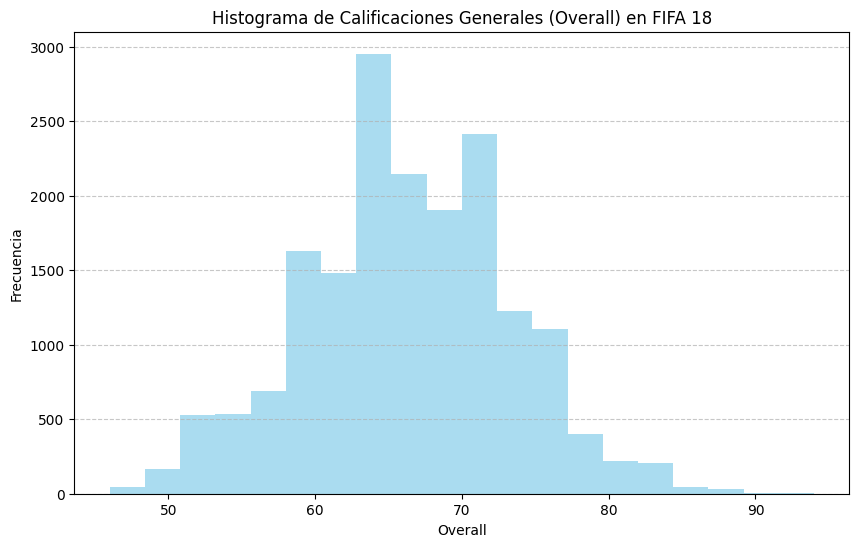

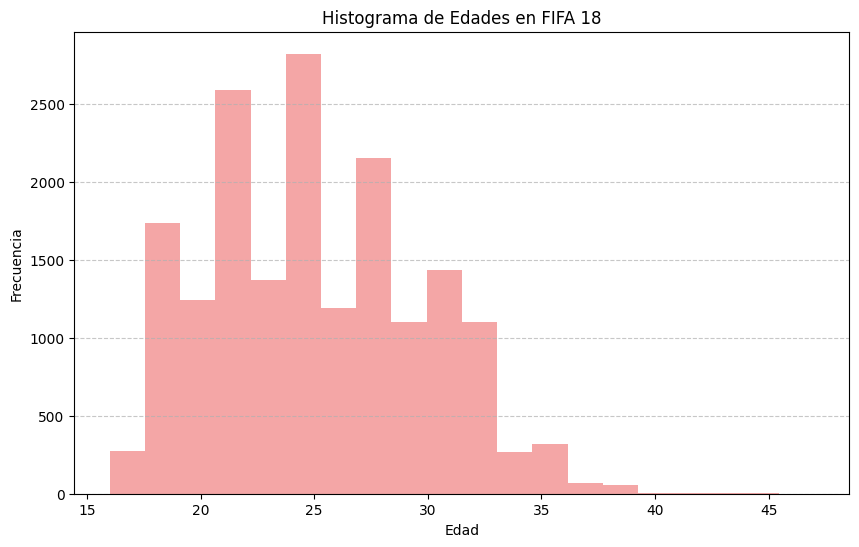

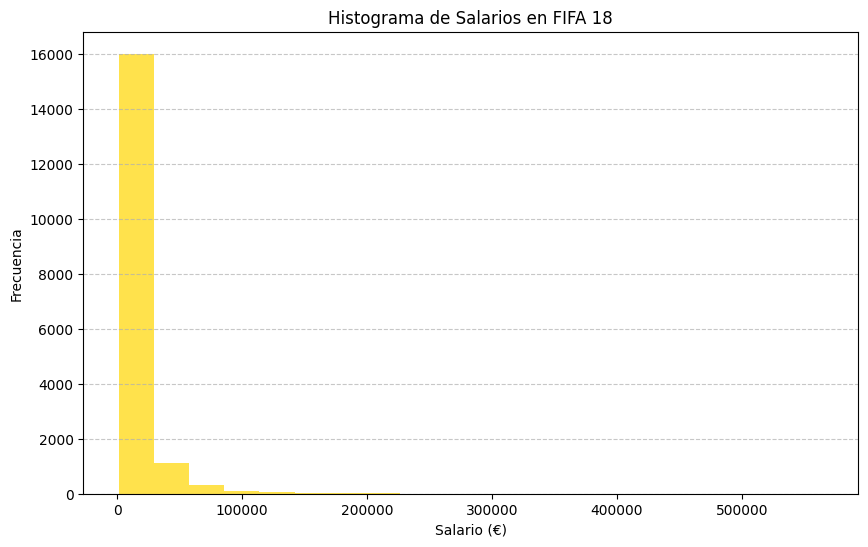

In [ ]:
# Seleccionar las columnas de interés
age = Tabla['Age']
overall = Tabla['Overall']
wage = Tabla['Wage (€)']

# Crear el histograma para Overall
plt.figure(figsize=(10, 6))
plt.hist(overall, bins=20, color='skyblue', alpha=0.7)
plt.xlabel('Overall')
plt.ylabel('Frecuencia')
plt.title('Histograma de Calificaciones Generales (Overall) en FIFA 18')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Crear el histograma para Age
plt.figure(figsize=(10, 6))
plt.hist(age, bins=20, color='lightcoral', alpha=0.7)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Edades en FIFA 18')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Crear el histograma para Wage (€)
plt.figure(figsize=(10, 6))
plt.hist(wage, bins=20, color='gold', alpha=0.7)
plt.xlabel('Salario (€)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Salarios en FIFA 18')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

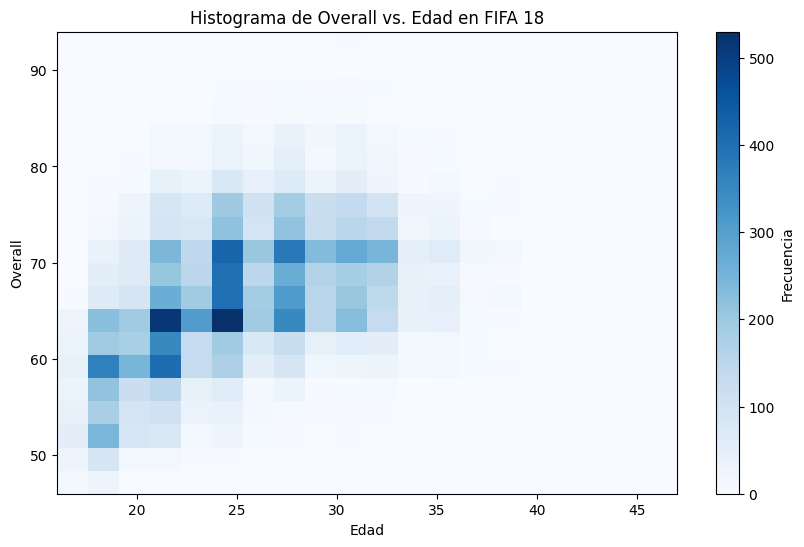

In [ ]:
# Seleccionar las columnas de interés
age = Tabla['Age']
overall = Tabla['Overall']

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist2d(age, overall, bins=(20, 20), cmap='Blues')
plt.colorbar(label='Frecuencia')
plt.xlabel('Edad')
plt.ylabel('Overall')
plt.title('Histograma de Overall vs. Edad en FIFA 18')
plt.show()

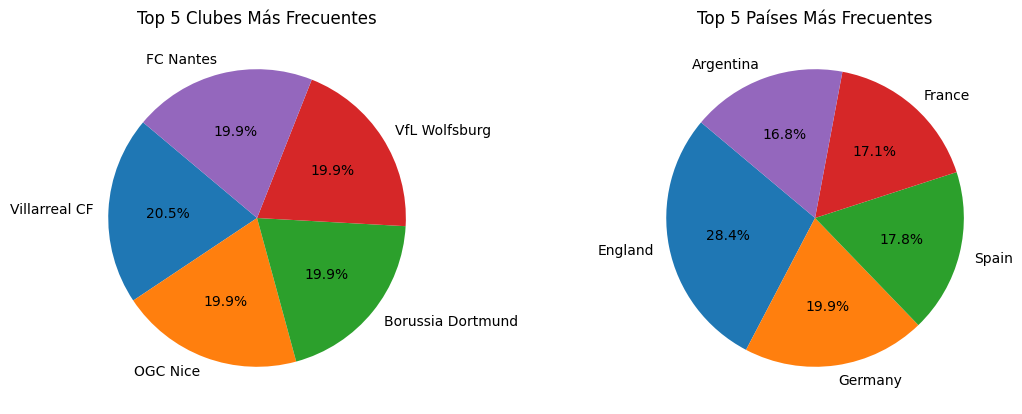

In [ ]:
# Los cinco clubes más frecuentes
top5_clubes = Tabla['Club'].value_counts().head(5)

# Los cinco países más frecuentes
top5_paises = Tabla['Nationality'].value_counts().head(5)

# Configuración para los gráficos de torta
plt.figure(figsize=(12, 6))
plt.subplots_adjust(wspace=0.5)  # Espaciado entre los gráficos

# Gráfico de torta para los clubes
plt.subplot(1, 2, 1)
plt.pie(top5_clubes, labels=top5_clubes.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Clubes Más Frecuentes')

# Gráfico de torta para los países
plt.subplot(1, 2, 2)
plt.pie(top5_paises, labels=top5_paises.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Países Más Frecuentes')

plt.show()

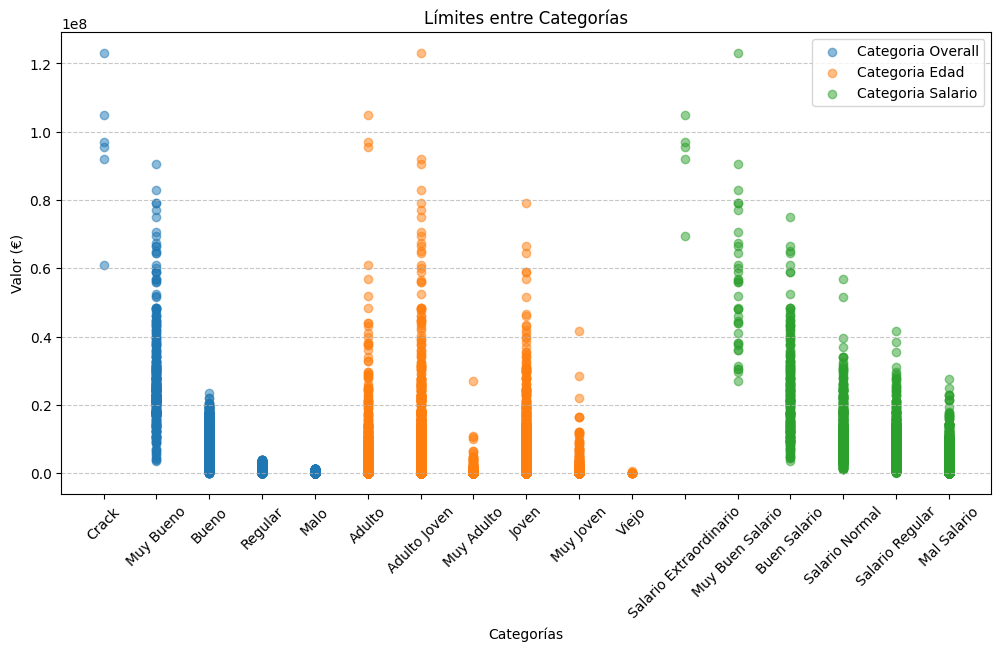

In [ ]:

# Paso 1: Crear un gráfico de dispersión para cada categoría
plt.figure(figsize=(12, 6))

# Gráfico para 'Categoria Overall'
plt.scatter(Tabla['Categoria Overall'], Tabla['Value (€)'], label='Categoria Overall', alpha=0.5)

# Gráfico para 'Categoria Edad'
plt.scatter(Tabla['Categoria Edad'], Tabla['Value (€)'], label='Categoria Edad', alpha=0.5)

# Gráfico para 'Categoria Salario'
plt.scatter(Tabla['Categoria Salario'], Tabla['Value (€)'], label='Categoria Salario', alpha=0.5)

plt.xlabel('Categorías')
plt.ylabel('Valor (€)')
plt.title('Límites entre Categorías')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

plt.show()

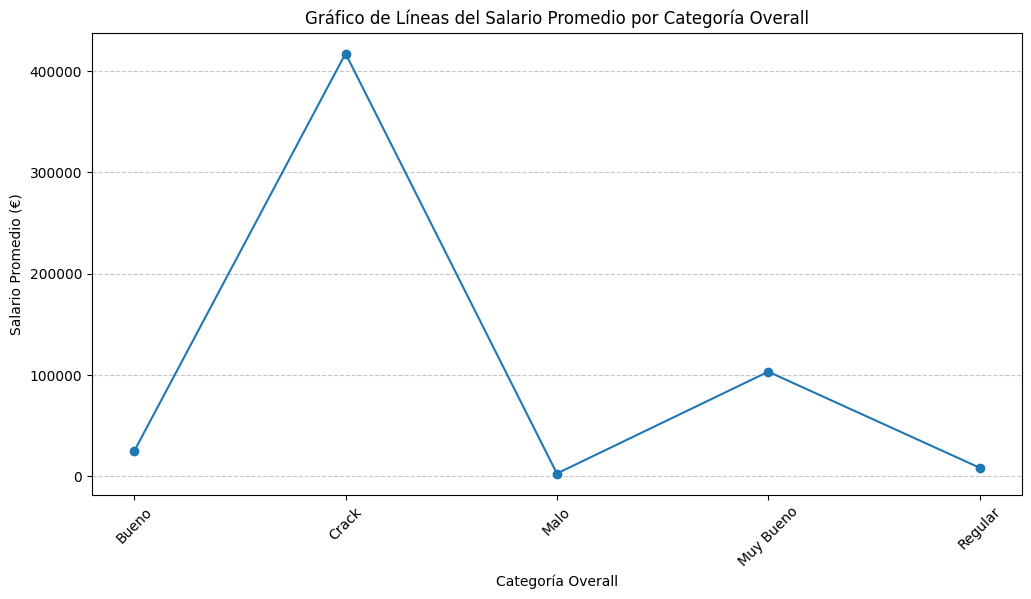

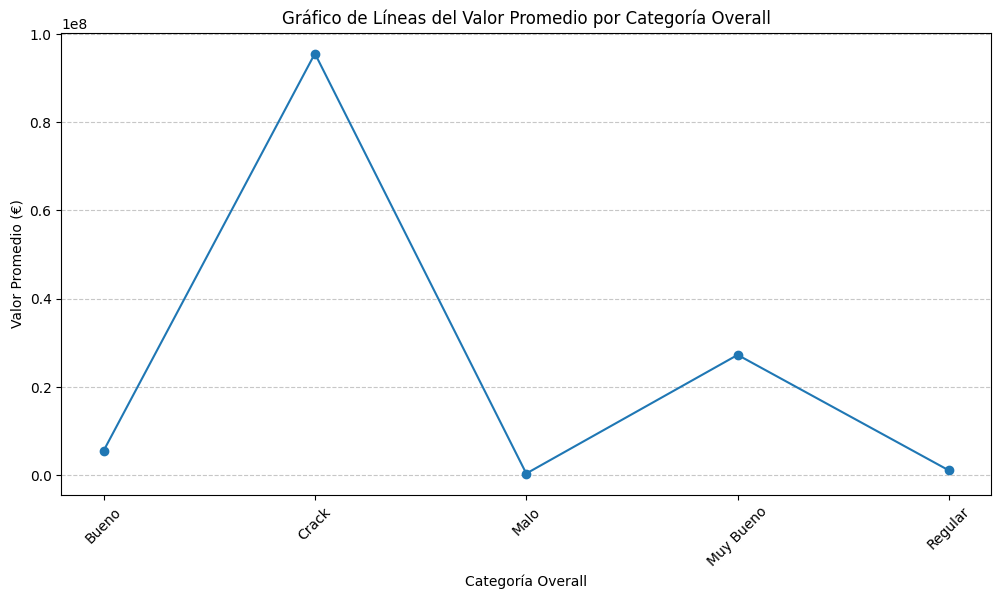

In [ ]:
# Supongamos que tienes tus datos en un DataFrame llamado 'Tabla'.

# Paso 1: Calcular el salario promedio para cada categoría de Overall
salario_promedio = Tabla.groupby('Categoria Overall')['Wage (€)'].mean().reset_index()

# Paso 2: Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(salario_promedio['Categoria Overall'], salario_promedio['Wage (€)'], marker='o', linestyle='-')
plt.xlabel('Categoría Overall')
plt.ylabel('Salario Promedio (€)')
plt.title('Gráfico de Líneas del Salario Promedio por Categoría Overall')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor claridad

plt.show()


# Paso 1: Calcular el valor promedio (Valorización) para cada categoría de Overall
valorizacion_promedio = Tabla.groupby('Categoria Overall')['Value (€)'].mean().reset_index()

# Paso 2: Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(valorizacion_promedio['Categoria Overall'], valorizacion_promedio['Value (€)'], marker='o', linestyle='-')
plt.xlabel('Categoría Overall')
plt.ylabel('Valor Promedio (€)')
plt.title('Gráfico de Líneas del Valor Promedio por Categoría Overall')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor claridad

plt.show()

<ipython-input-17-dca7f8351363>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Tabla_final.corr(), annot = True, cmap = 'Wistia')


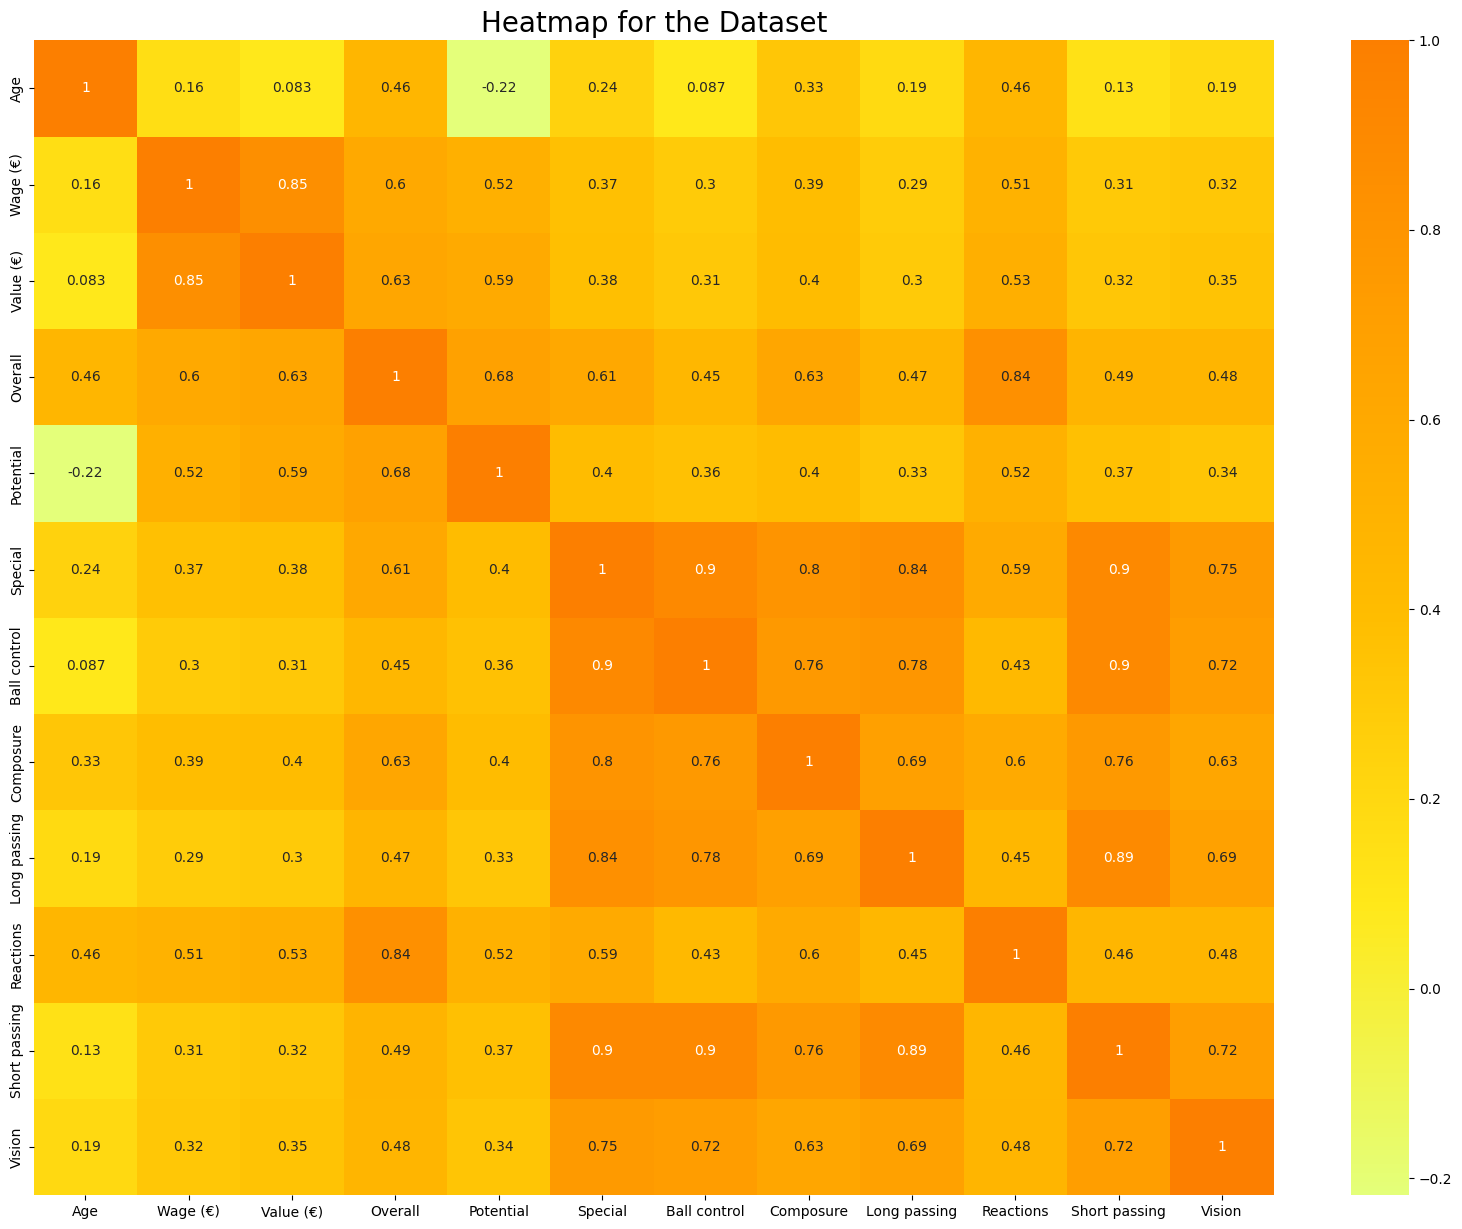

In [ ]:
#Mapa Correlacion de Calor
plt.rcParams['figure.figsize'] = (20, 15)
sns.heatmap(Tabla_final.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

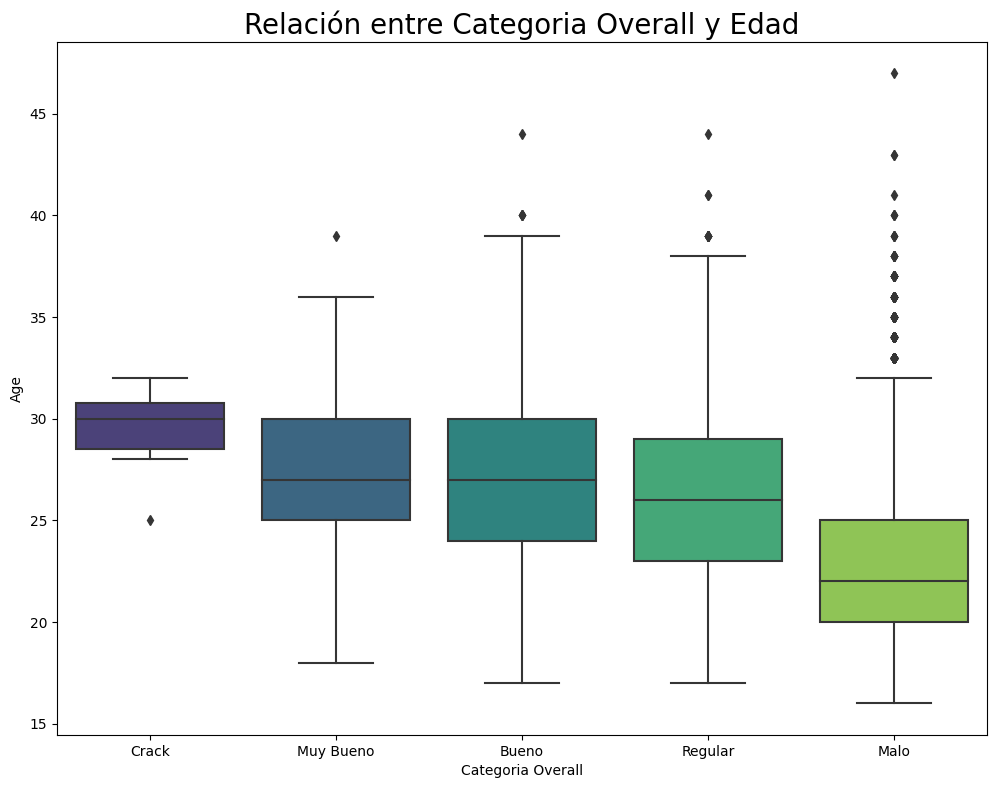

In [ ]:
# Overall y Edad
plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(x=Tabla['Categoria Overall'], y=datos_final['Age'], palette='viridis')
plt.title('Relación entre Categoria Overall y Edad', fontsize = 20)
plt.show()

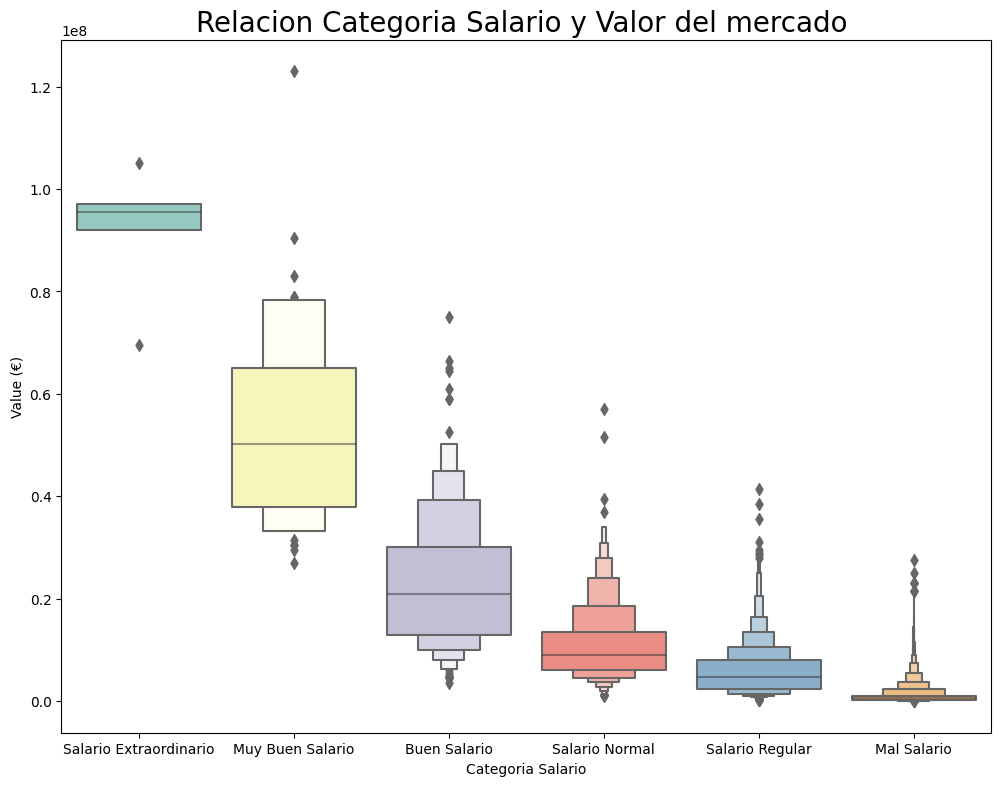

In [ ]:
# Relacion entre Categoria de Salario y Valor del mercado
sns.boxenplot(x='Categoria Salario', y='Value (€)', data=Tabla, palette='Set3')
plt.title('Relacion Categoria Salario y Valor del mercado ', fontsize = 20, fontweight = 30)
plt.show()

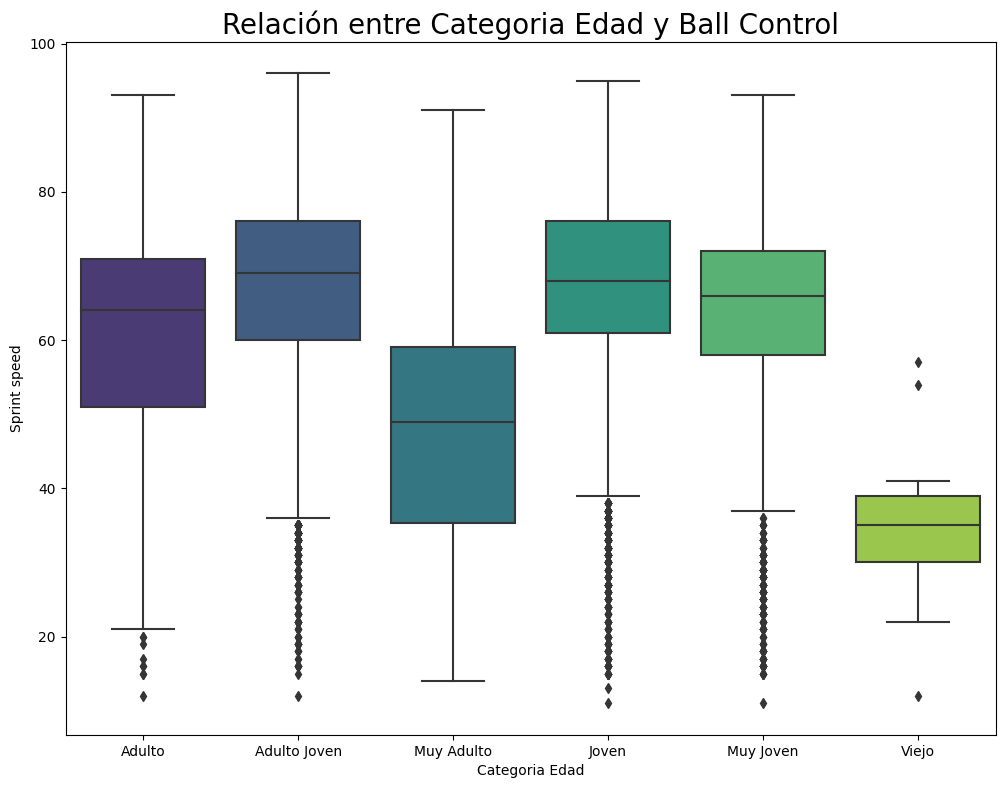

In [ ]:
# Overall y Edad
plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(x=Tabla['Categoria Edad'], y=Tabla['Sprint speed'], palette='viridis')
plt.title('Relación entre Categoria Edad y Ball Control', fontsize = 20)
plt.show()

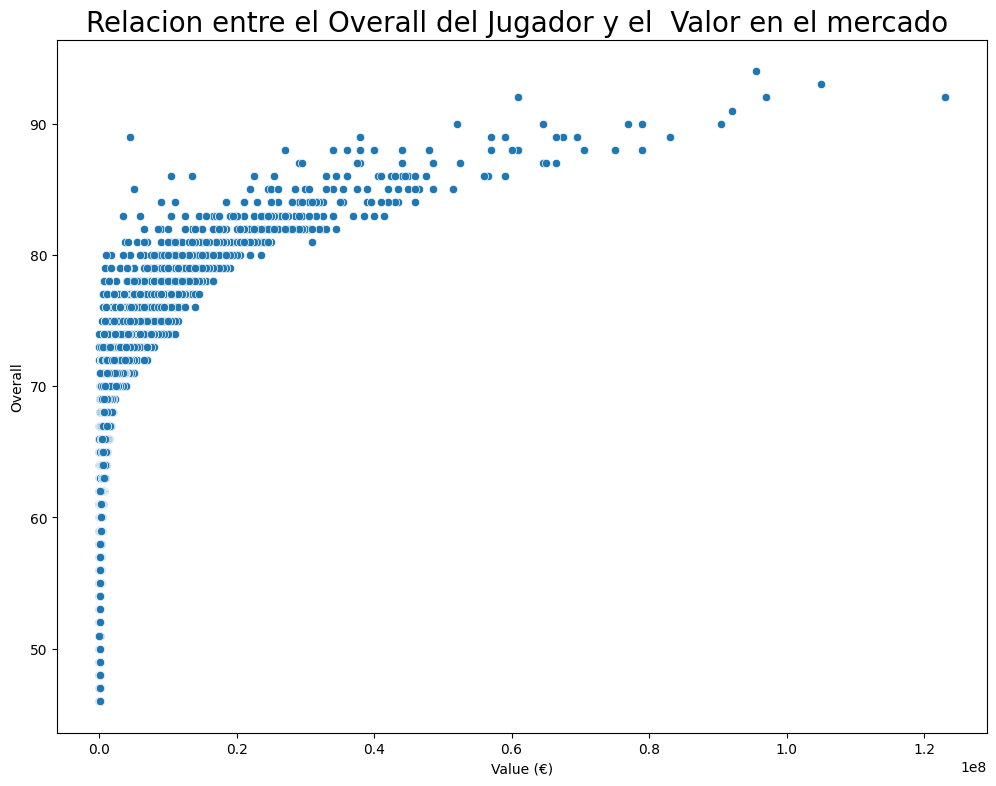

In [ ]:
plt.rcParams['figure.figsize'] = (12, 9)
sns.scatterplot(x="Value (€)", y="Overall", data=Tabla)
plt.title('Relacion entre el Overall del Jugador y el  Valor en el mercado ', fontsize=20)
plt.show()

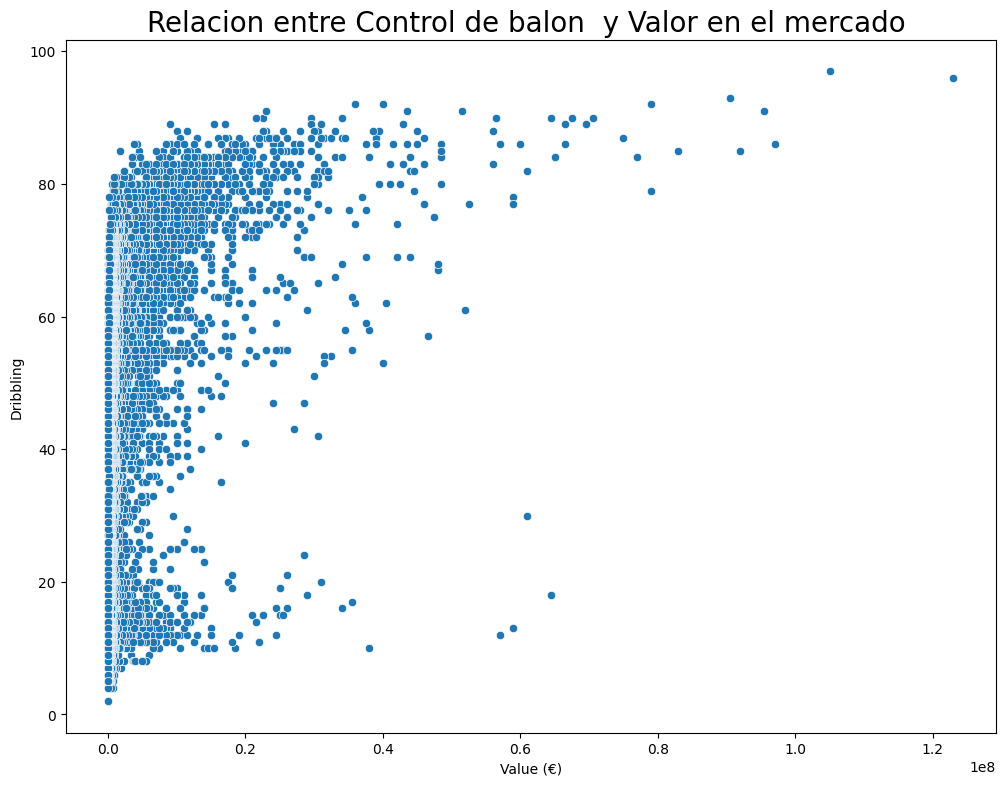

In [ ]:
plt.rcParams['figure.figsize'] = (12, 9)
sns.scatterplot(x="Value (€)", y="Dribbling", data=Tabla)
plt.title('Relacion entre Control de balon  y Valor en el mercado ', fontsize=20)
plt.show()

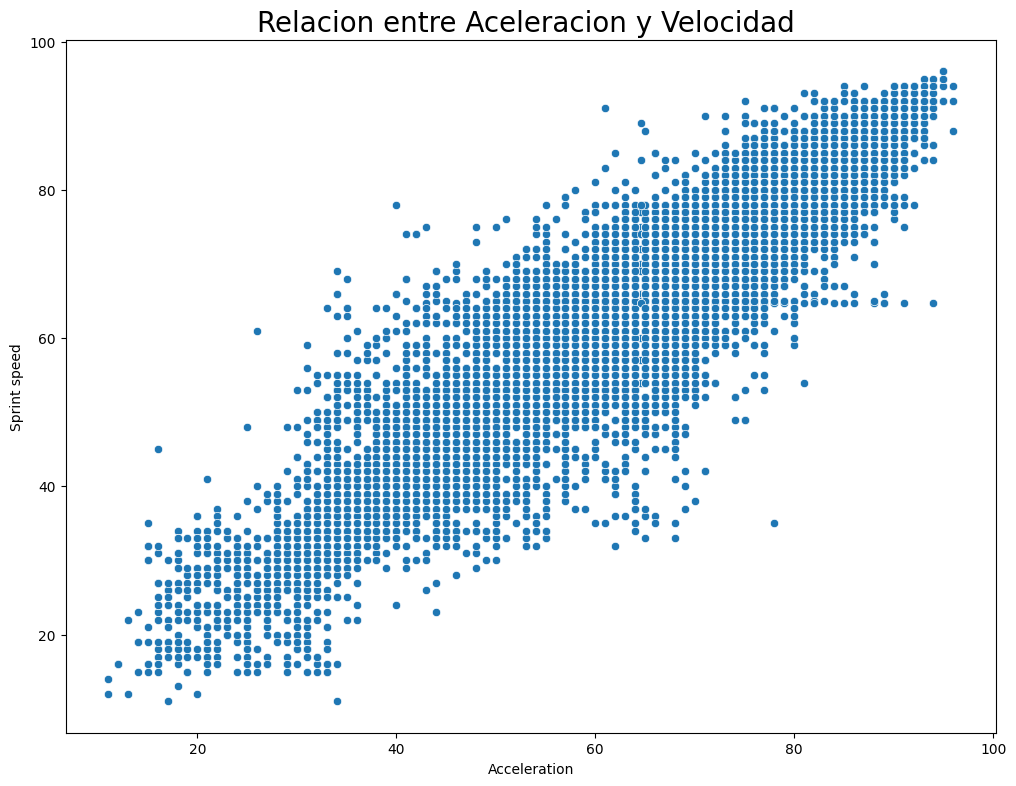

In [ ]:
plt.rcParams['figure.figsize'] = (12, 9)
sns.scatterplot(x="Acceleration", y="Sprint speed", data=Tabla)
plt.title('Relacion entre Aceleracion y Velocidad ', fontsize=20)
plt.show()

In [ ]:
Tabla.groupby('Categoria Salario')['Overall'].describe()

,count,mean,std,min,25%,50%,75%,max
Categoria Salario,,,,,,,,
Buen Salario,244.0,81.778689,3.037522,73.0,80.0,82.0,84.0,89.0
Mal Salario,14887.0,64.467724,5.934301,46.0,61.0,65.0,69.0,83.0
Muy Buen Salario,36.0,87.750000,1.947526,84.0,86.0,88.0,89.0,92.0
Salario Extraordinario,5.0,91.800000,1.923538,89.0,91.0,92.0,93.0,94.0
Salario Normal,665.0,77.255639,3.147130,68.0,75.0,77.0,79.0,88.0
Salario Regular,1896.0,73.748945,3.472052,64.0,71.0,74.0,76.0,84.0


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_9, *['count'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_10, *['mean'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_11, *['std'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_12, *['min'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_13, *['count'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_14, *['mean'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_15, *['std'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_16, *['min'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_17, *[[['count', 'mean'], ['mean', 'std'], ['std', 'min'], ['min', '25%']]], **{})
chart

In [ ]:
Tabla.groupby('Categoria Overall')['Value (€)'].describe()

,count,mean,std,min,25%,50%,75%,max
Categoria Overall,,,,,,,,
Bueno,4390.0,5.479633e+06,3.699501e+06,0.0,2800000.0,4400000.0,7500000.0,23500000.0
Crack,6.0,9.558333e+07,2.025442e+07,61000000.0,92875000.0,96250000.0,103000000.0,123000000.0
Malo,8026.0,3.408136e+05,2.168377e+05,0.0,160000.0,300000.0,475000.0,1200000.0
Muy Bueno,383.0,2.724151e+07,1.417177e+07,3500000.0,18000000.0,24000000.0,31500000.0,90500000.0
Regular,4928.0,1.033630e+06,5.401047e+05,0.0,675000.0,900000.0,1200000.0,3900000.0


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_9, *['count'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_10, *['mean'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_11, *['std'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_12, *['min'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_13, *['count'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_14, *['mean'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_15, *['std'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_16, *['min'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_17, *[[['count', 'mean'], ['mean', 'std'], ['std', 'min'], ['min', '25%']]], **{})
chart

In [ ]:
Tabla.groupby('Categoria Overall')['Special'].describe()

,count,mean,std,min,25%,50%,75%,max
Categoria Overall,,,,,,,,
Bueno,4390.0,1779.002278,235.510175,917.0,1711.00,1836.0,1929.0,2196.0
Crack,6.0,2068.166667,289.827132,1493.0,2110.75,2148.5,2209.5,2291.0
Malo,8026.0,1444.440817,231.180522,728.0,1351.00,1489.0,1607.0,1927.0
Muy Bueno,383.0,1918.120104,280.510905,1122.0,1874.50,2001.0,2099.0,2286.0
Regular,4928.0,1648.396104,212.494615,884.0,1587.00,1701.0,1786.0,2036.0


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_18, *['count'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_19, *['mean'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_20, *['std'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_21, *['min'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_22, *['count'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_23, *['mean'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_24, *['std'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_25, *['min'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_26, *[[['count', 'mean'], ['mean', 'std'], ['std', 'min'], ['min', '25%']]], **{})
chart

In [ ]:
Tabla.groupby('Categoria Overall')['Potential'].describe()

,count,mean,std,min,25%,50%,75%,max
Categoria Overall,,,,,,,,
Bueno,4390.0,76.255353,3.968971,71.0,73.0,76.0,79.00,90.0
Crack,6.0,92.666667,1.211060,91.0,92.0,92.5,93.75,94.0
Malo,8026.0,67.840643,5.340577,46.0,64.0,68.0,72.00,90.0
Muy Bueno,383.0,84.992167,3.023891,81.0,82.0,84.0,87.00,94.0
Regular,4928.0,71.112825,4.062663,66.0,68.0,70.0,74.00,86.0


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_27, *['count'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_28, *['mean'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_29, *['std'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_30, *['min'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_31, *['count'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_32, *['mean'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_33, *['std'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_34, *['min'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_35, *[[['count', 'mean'], ['mean', 'std'], ['std', 'min'], ['min', '25%']]], **{})
chart

In [ ]:
Tabla.groupby('Categoria Edad')['Sprint speed'].describe()

,count,mean,std,min,25%,50%,75%,max
Categoria Edad,,,,,,,,
Adulto,2802.0,60.482708,14.795212,12.0,51.00,64.0,71.0,93.0
Adulto Joven,5943.0,66.751983,13.887912,12.0,60.00,69.0,76.0,96.0
Joven,6526.0,66.677505,13.911073,11.0,61.00,68.0,76.0,95.0
Muy Adulto,438.0,48.206363,14.532661,14.0,35.25,49.0,59.0,91.0
Muy Joven,2009.0,62.882304,14.673995,11.0,58.00,66.0,72.0,93.0
Viejo,15.0,34.800000,11.238963,12.0,30.00,35.0,39.0,57.0


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['count'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['mean'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['std'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['min'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['count'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['mean'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_6, *['std'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_7, *['min'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_8, *[[['count', 'mean'], ['mean', 'std'], ['std', 'min'], ['min', '25%']]], **{})
chart

<Figure size 1500x1000 with 0 Axes>

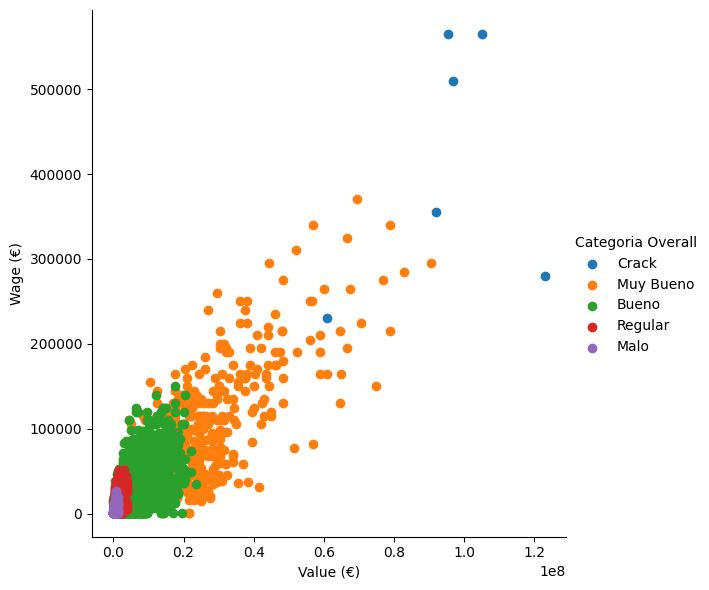

In [ ]:
#FacetGrid Con Valorizacion de mercado y Salario
plt.figure(figsize=(15, 10))
g = sns.FacetGrid(Tabla, hue='Categoria Overall',height=6)
g.map(plt.scatter, 'Value (€)', 'Wage (€)').add_legend()
plt.show()

<Figure size 1500x2000 with 0 Axes>

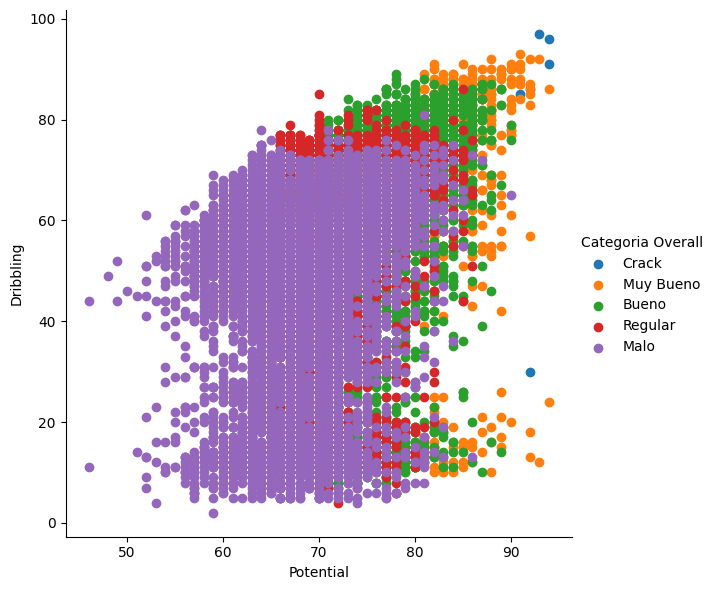

In [ ]:
#FacetGrid Con Dribbling y Potential
plt.figure(figsize=(15, 20))
g = sns.FacetGrid(Tabla, hue='Categoria Overall',height=6)
g.map(plt.scatter, "Potential", 'Dribbling').add_legend()
plt.show()

<Figure size 1500x2000 with 0 Axes>

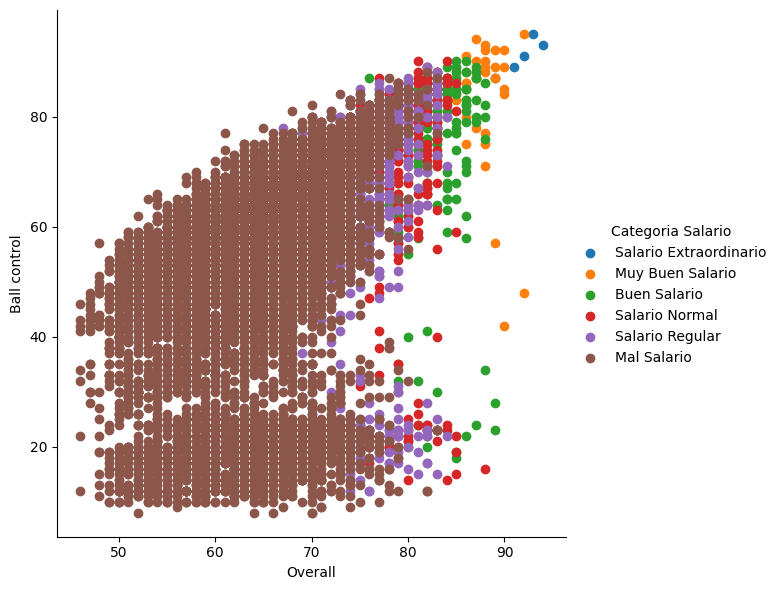

In [ ]:
#FacetGrid Con Dribbling y Potential
plt.figure(figsize=(15, 20))
g = sns.FacetGrid(Tabla, hue='Categoria Salario',height=6)
g.map(plt.scatter, "Overall", 'Ball control').add_legend()
plt.show()

<Figure size 1500x2000 with 0 Axes>

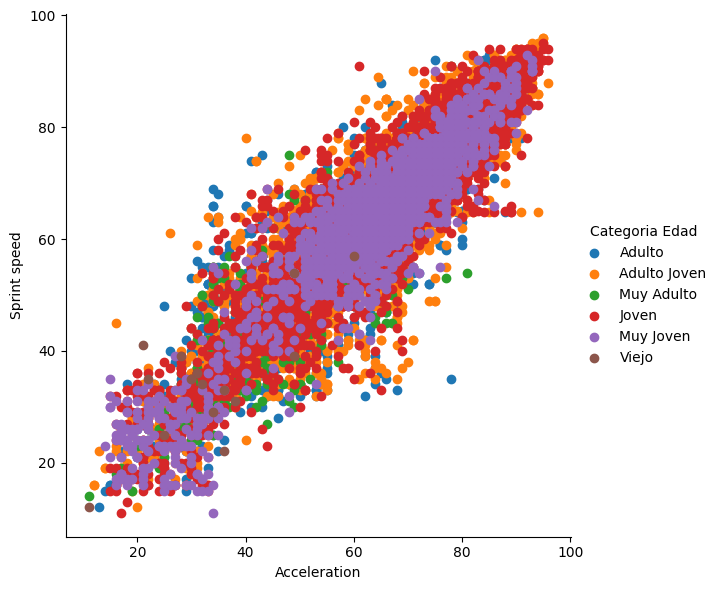

In [ ]:
#FacetGrid Con Dribbling y Potential
plt.figure(figsize=(15, 20))
g = sns.FacetGrid(Tabla, hue='Categoria Edad',height=6)
g.map(plt.scatter, "Acceleration", 'Sprint speed').add_legend()
plt.show()

In [ ]:

#Que variable es mas signifivativa para el Overall del Jugador

import pandas as pd
import scipy.stats as stats

numericas = Tabla.select_dtypes(['int64','float64']).columns
categoricas = Tabla.select_dtypes(['object']).columns

# Paso 1: Características categóricas (ANOVAs)

anova_results = {}

for categoria in categoricas:
    groups = Tabla.groupby(categoria)['Overall']
    f_statistic, p_value = stats.f_oneway(*[group for name, group in groups])
    anova_results[categoria] = {'F-Statistic': f_statistic, 'p-value': p_value}


correlation_results = {}

for numerica in numericas:
    correlation, _ = stats.pearsonr(Tabla[numerica], Tabla['Overall'])
    correlation_results[numerica] = {'Correlation': correlation}

# Mostrar los resultados
print("Resultados ANOVA para características categóricas:")
for categoria, result in anova_results.items():
    print(f"{categoria}: F-Statistic = {result['F-Statistic']}, p-value = {result['p-value']}")

print("\nResultados de correlación para características numéricas:")
for numerica, result in correlation_results.items():
    print(f"{numerica}: Correlation = {result['Correlation']}")

Resultados ANOVA para características categóricas:
Name: F-Statistic = 1.2479617062497312, p-value = 1.985904013970841e-06
Categoria Edad: F-Statistic = 1196.7468089505296, p-value = 0.0
Nationality: F-Statistic = 21.208880368109124, p-value = 0.0
Categoria Salario: F-Statistic = 1996.9945790800184, p-value = 0.0
Categoria Overall: F-Statistic = 17242.165275565145, p-value = 0.0
Club: F-Statistic = 19.916874384490345, p-value = 0.0

Resultados de correlación para características numéricas:
Age: Correlation = 0.46079712699778874
Wage (€): Correlation = 0.5989179290703215
Value (€): Correlation = 0.6309989235458688
Overall: Correlation = 0.9999999999999977
Potential: Correlation = 0.6830184634135892
Special: Correlation = 0.6065450904937657
Acceleration: Correlation = 0.2060328520114828
Aggression: Correlation = 0.4001998174714818
Agility: Correlation = 0.26696487953285297
Balance: Correlation = 0.0968326274884154
Ball control: Correlation = 0.45278313652066743
Composure: Correlation = 0

Paso 1: Características Categóricas (ANOVA)

Importa las bibliotecas necesarias, como pandas y scipy.stats.

Define una lista llamada 'categoricas' que contiene los nombres de las características categóricas en tu DataFrame 'datos_final'. Estas características categóricas pueden ser, por ejemplo, 'Categoria Edad', 'Categoria Salario' y 'Categoria Overall'.

Crea un diccionario llamado 'anova_results' para almacenar los resultados del análisis de varianza.

Itera a través de cada característica categórica en la lista 'categoricas'.

Agrupa el DataFrame 'datos_final' por la característica categórica actual ('categoria') y selecciona la columna 'Overall'. Esto divide tus datos en grupos según la categoría actual.

Calcula la estadística F y el valor p utilizando stats.f_oneway. Esto realiza un ANOVA en los grupos de 'Overall' de acuerdo con la característica categórica actual.

Almacena los resultados del ANOVA (estadística F y valor p) en el diccionario 'anova_results' bajo la clave correspondiente ('categoria').

Paso 2: Características Numéricas (Correlación de Pearson)

Define una lista llamada 'numericas' que contiene los nombres de las características numéricas en tu DataFrame 'datos_final'. Estas características numéricas pueden ser, por ejemplo, 'Acceleration', 'Aggression', 'Agility', etc.

Crea un diccionario llamado 'correlation_results' para almacenar los resultados de la correlación de Pearson.

Itera a través de cada característica numérica en la lista 'numericas'.

Calcula la correlación de Pearson entre la característica numérica actual ('numerica') y la columna 'Overall' de tu DataFrame utilizando stats.pearsonr.

Almacena los resultados de la correlación (coeficiente de correlación) en el diccionario 'correlation_results' bajo la clave correspondiente ('numerica').

Paso 3: Mostrar los Resultados

Imprime los resultados del ANOVA para las características categóricas. Esto mostrará la estadística F y el valor p para cada característica categórica.

Imprime los resultados de la correlación de Pearson para las características numéricas. Esto mostrará el coeficiente de correlación para cada característica numérica.

En resumen, este código te proporcionará información sobre cómo las características categóricas se relacionan con la variable 'Overall' a través de ANOVA y cómo las características numéricas están correlacionadas con 'Overall' mediante la correlación de Pearson.

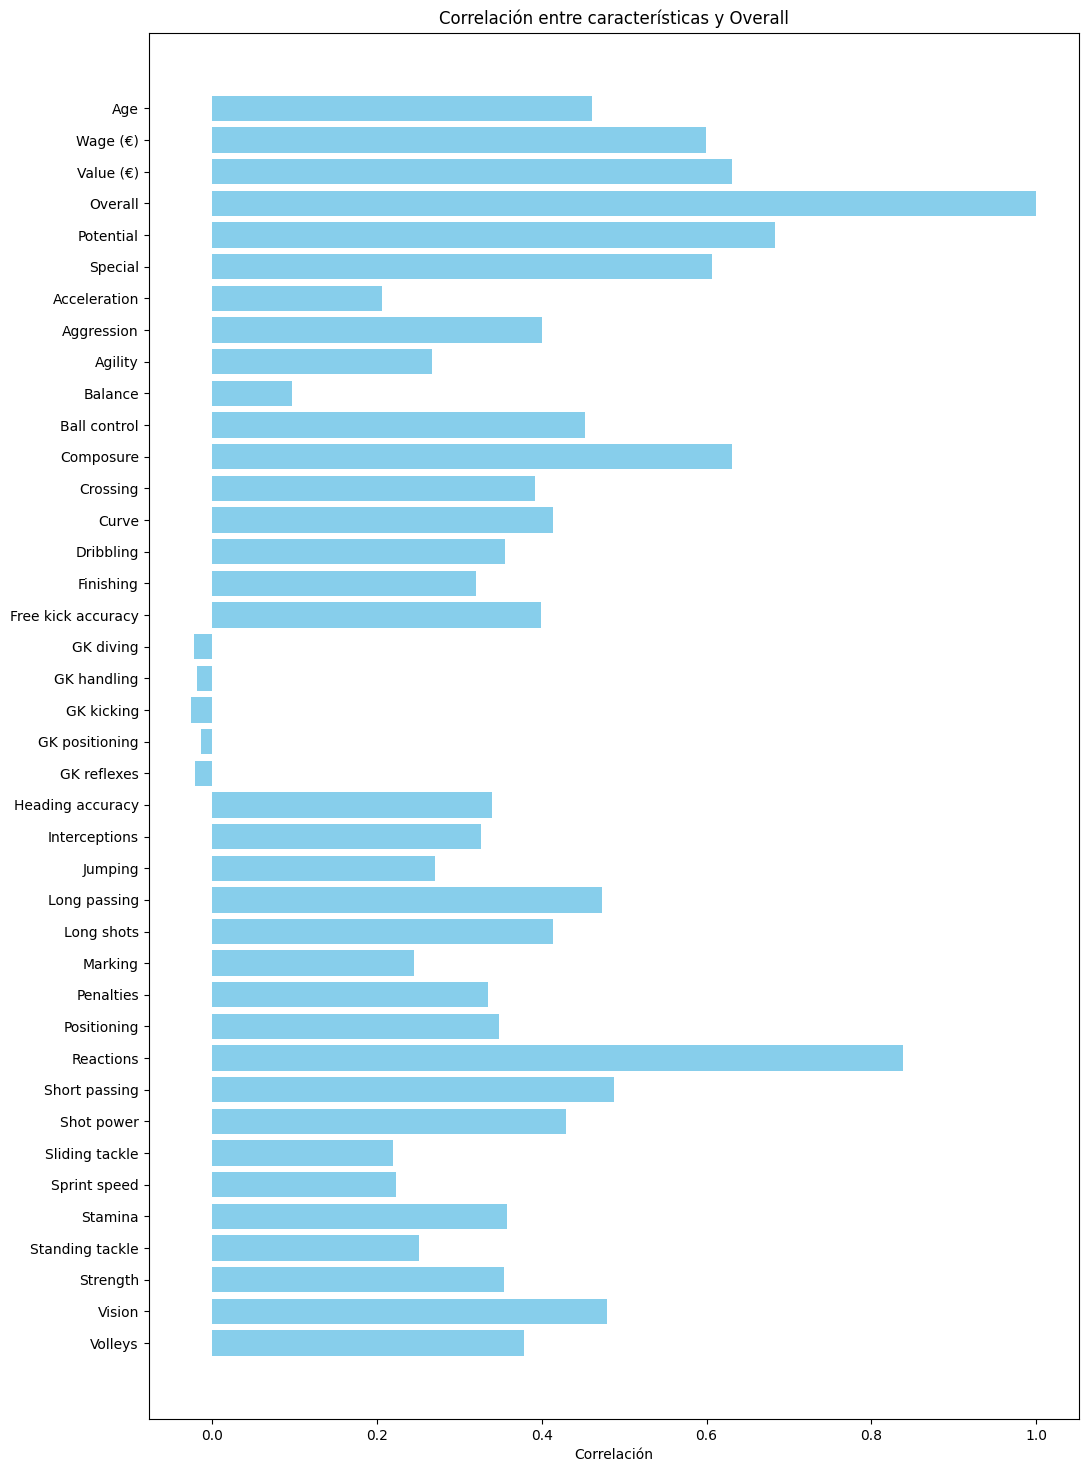

In [ ]:
# Crear un diccionario de correlaciones
correlaciones = {
    'Age': 0.46079712699778874,
    'Wage (€)': 0.5989179290703215,
    'Value (€)': 0.6309989235458688,
    'Overall': 0.9999999999999977,
    'Potential': 0.6830184634135892,
    'Special': 0.6065450904937657,
    'Acceleration': 0.2060328520114828,
    'Aggression': 0.4001998174714818,
    'Agility': 0.26696487953285297,
    'Balance': 0.0968326274884154,
    'Ball control': 0.45278313652066743,
    'Composure': 0.6306755971071718,
    'Crossing': 0.39192843867570387,
    'Curve': 0.4134348133259278,
    'Dribbling': 0.35586571302087994,
    'Finishing': 0.3209135529324183,
    'Free kick accuracy': 0.3991902718089537,
    'GK diving': -0.021844162961018945,
    'GK handling': -0.018270934041690712,
    'GK kicking': -0.025414458556174968,
    'GK positioning': -0.012713098854838583,
    'GK reflexes': -0.020383104427965218,
    'Heading accuracy': 0.33952792096523254,
    'Interceptions': 0.3264345427645715,
    'Jumping': 0.27083595145386835,
    'Long passing': 0.47369767088085973,
    'Long shots': 0.41346339407433297,
    'Marking': 0.24495678904443796,
    'Penalties': 0.33487079961996613,
    'Positioning': 0.3477432770000427,
    'Reactions': 0.8383616882354896,
    'Short passing': 0.4878013760336878,
    'Shot power': 0.4293075727020443,
    'Sliding tackle': 0.2198841655544213,
    'Sprint speed': 0.22323261997717456,
    'Stamina': 0.35752748116745503,
    'Standing tackle': 0.2510659852087408,
    'Strength': 0.3547169136731766,
    'Vision': 0.4787853801622823,
    'Volleys': 0.3790583593376113
}

# Convertir el diccionario en dos listas separadas
variables = list(correlaciones.keys())
valores = list(correlaciones.values())

# Crear el gráfico de barras
plt.figure(figsize=(12, 18))  # Ajustar el tamaño para que todas las variables sean visibles
plt.barh(variables, valores, color='skyblue')
plt.xlabel('Correlación')
plt.title('Correlación entre características y Overall')
plt.gca().invert_yaxis()  # Invertir el eje y para que las variables más importantes estén arriba
plt.show()

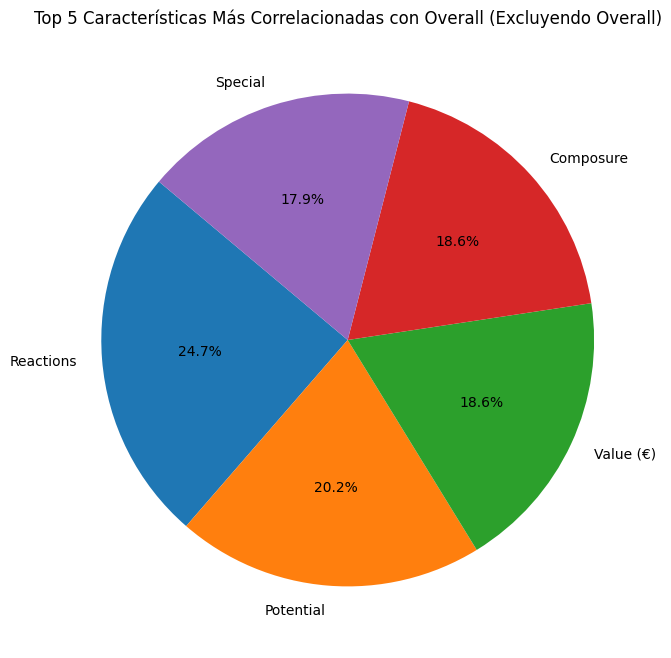

In [ ]:
# Eliminar 'Overall' de las correlaciones
correlaciones.pop('Overall', None)

# Obtener las 5 características más correlacionadas con 'Overall'
top5_correlaciones = dict(sorted(correlaciones.items(), key=lambda item: abs(item[1]), reverse=True)[:5])

# Crear un gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(top5_correlaciones.values(), labels=top5_correlaciones.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Características Más Correlacionadas con Overall (Excluyendo Overall)')
plt.show()

In [ ]:

numericas = Tabla.select_dtypes(['int64','float64']).columns
categoricas = Tabla.select_dtypes(['object']).columns

# Paso 1: Características categóricas (ANOVAs)
anova_results = {}

for categoria in categoricas:
    groups = Tabla.groupby(categoria)['Value (€)']
    f_statistic, p_value = stats.f_oneway(*[group for name, group in groups])
    anova_results[categoria] = {'F-Statistic': f_statistic, 'p-value': p_value}

# Paso 2: Características numéricas (correlación de Pearson)
correlation_results = {}

for numerica in numericas:
    correlation, _ = stats.pearsonr(Tabla[numerica], Tabla['Value (€)'])
    correlation_results[numerica] = {'Correlation': correlation}

# Mostrar los resultados
print("Resultados ANOVA para características categóricas:")
for categoria, result in anova_results.items():
    print(f"{categoria}: F-Statistic = {result['F-Statistic']}, p-value = {result['p-value']}")

print("\nResultados de correlación para características numéricas:")
for numerica, result in correlation_results.items():
    print(f"{numerica}: Correlation = {result['Correlation']}")

Resultados ANOVA para características categóricas:
Name: F-Statistic = 1.0752820255363085, p-value = 0.06231653225808087
Categoria Edad: F-Statistic = 94.47797346258868, p-value = 1.5373597705900686e-98
Nationality: F-Statistic = 5.850106975446964, p-value = 3.547074423282084e-108
Categoria Salario: F-Statistic = 6767.889431202308, p-value = 0.0
Categoria Overall: F-Statistic = 11762.858236108794, p-value = 0.0
Club: F-Statistic = 22.13612772022995, p-value = 0.0

Resultados de correlación para características numéricas:
Age: Correlation = 0.08347470304924548
Wage (€): Correlation = 0.8500606419036401
Value (€): Correlation = 1.0
Overall: Correlation = 0.6309989235458688
Potential: Correlation = 0.5909956004609193
Special: Correlation = 0.3796079498761664
Acceleration: Correlation = 0.17760073993223086
Aggression: Correlation = 0.1879952916919087
Agility: Correlation = 0.20196386662206425
Balance: Correlation = 0.106288279230956
Ball control: Correlation = 0.3104364027545625
Composure:

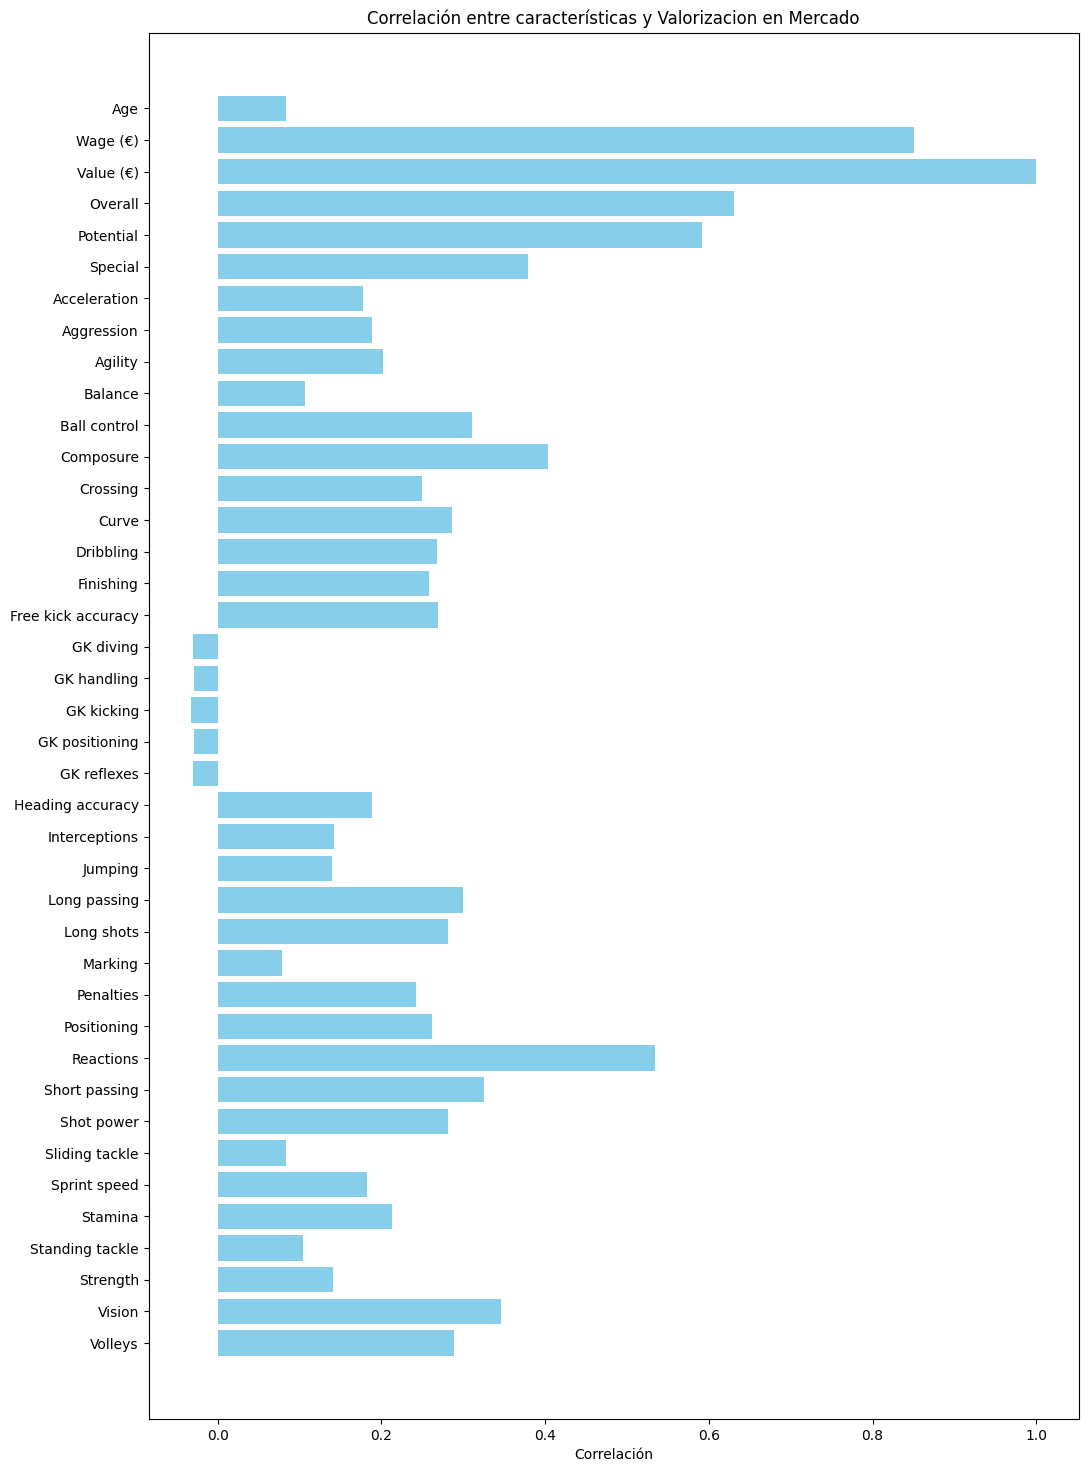

In [ ]:
#Definir las características y sus correlaciones

correlaciones_dict = {
    'Age': 0.08347470304924548,
    'Wage (€)': 0.8500606419036401,
    'Value (€)': 1.0,
    'Overall': 0.6309989235458688,
    'Potential': 0.5909956004609193,
    'Special': 0.3796079498761664,
    'Acceleration': 0.17760073993223086,
    'Aggression': 0.1879952916919087,
    'Agility': 0.20196386662206425,
    'Balance': 0.106288279230956,
    'Ball control': 0.3104364027545625,
    'Composure': 0.40378116797142344,
    'Crossing': 0.24943909709496492,
    'Curve': 0.2860891749122545,
    'Dribbling': 0.26780323756777863,
    'Finishing': 0.25757283325643243,
    'Free kick accuracy': 0.2694412638030702,
    'GK diving': -0.030311207192625988,
    'GK handling': -0.02848078787179508,
    'GK kicking': -0.03277657727108885,
    'GK positioning': -0.02929273985080891,
    'GK reflexes': -0.030589164370029197,
    'Heading accuracy': 0.18864149866021446,
    'Interceptions': 0.14264659503774715,
    'Jumping': 0.13938186065350144,
    'Long passing': 0.29937912982660647,
    'Long shots': 0.2811573105385181,
    'Marking': 0.07810801592307637,
    'Penalties': 0.2423502510134338,
    'Positioning': 0.2619184785133739,
    'Reactions': 0.5339041037236303,
    'Short passing': 0.32477176088054943,
    'Shot power': 0.2811247071784719,
    'Sliding tackle': 0.08384362204112841,
    'Sprint speed': 0.18187081710824343,
    'Stamina': 0.2124274637744025,
    'Standing tackle': 0.10398275020306492,
    'Strength': 0.14079305207836165,
    'Vision': 0.3461154507958725,
    'Volleys': 0.288190980826694
}
variables = list(correlaciones_dict.keys())
valores = list(correlaciones_dict.values())

# Crear el gráfico de barras
plt.figure(figsize=(12, 18))  # Ajustar el tamaño para que todas las variables sean visibles
plt.barh(variables, valores, color='skyblue')
plt.xlabel('Correlación')
plt.title('Correlación entre características y Valorizacion en Mercado')
plt.gca().invert_yaxis()  # Invertir el eje y para que las variables más importantes estén arriba
plt.show()


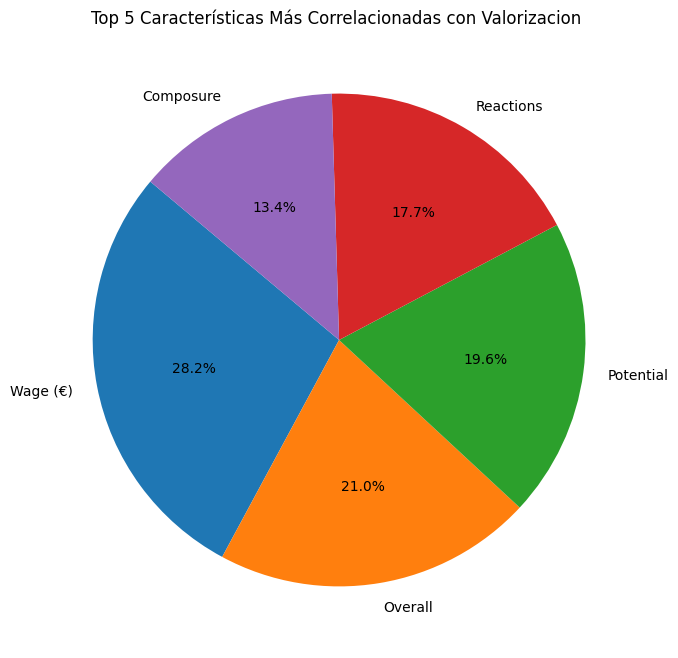

In [ ]:
# Elimina 'Value (€)' del diccionario de correlaciones

# Encuentra las 5 características más correlacionadas con 'Value-Valorizacion en el mercado ' (excluyendo 'Value (€)')
top5_correlaciones = dict(sorted(correlaciones_dict.items(), key=lambda item: abs(item[1]), reverse=True)[:5])

# Crea un gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(top5_correlaciones.values(), labels=top5_correlaciones.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Características Más Correlacionadas con Valorizacion ')
plt.show()